In [ ]:
import numpy as np
import glob
import os
import time
import hmac
import hashlib
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd

Uploaded file to Edge Impulse 200 b'eeg_signal_0.50qk7up3.json'
Uploaded file to Edge Impulse 200 b'eeg_signal_1.50qk84ag.json'
Uploaded file to Edge Impulse 200 b'eeg_signal_2.50qk873t.json'
Uploaded file to Edge Impulse 200 b'eeg_signal_3.50qk8c1p.json'


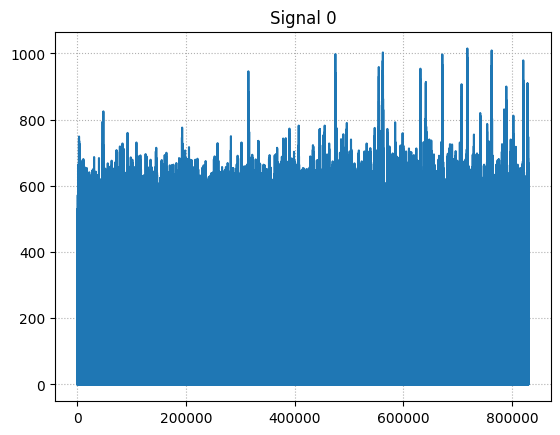

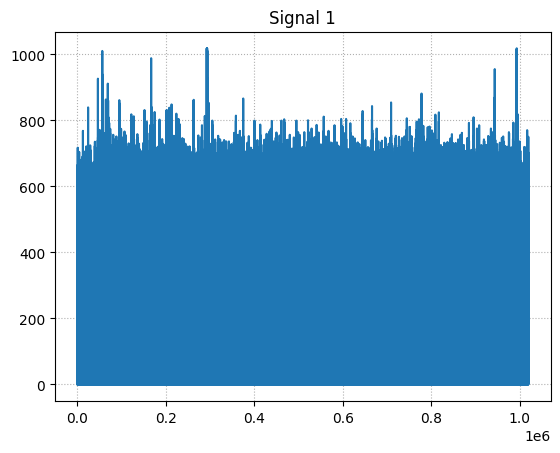

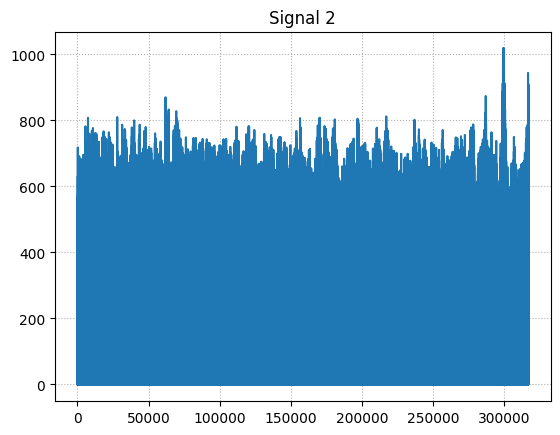

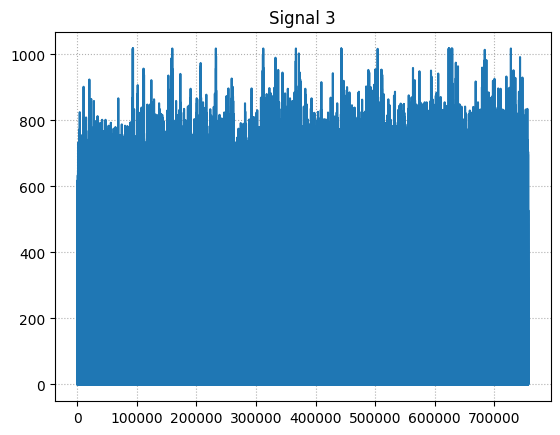

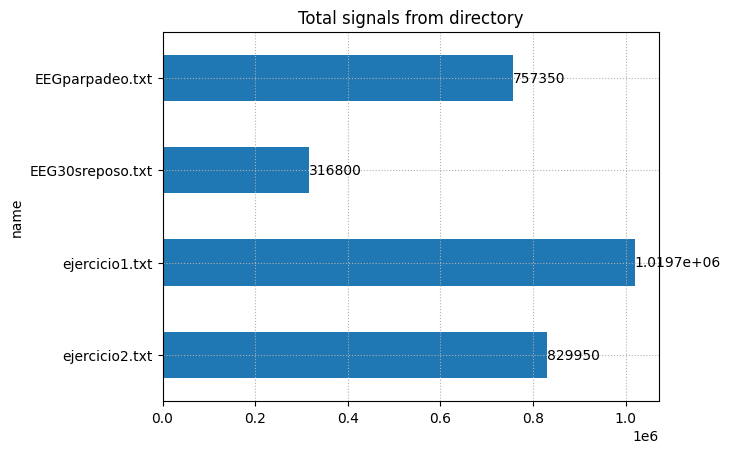

In [ ]:
# Directorio de archivos EEG
path = "/content/sample_data"  # Cambia esta ruta al directorio donde están tus archivos .txt de EMG
files = glob.glob(os.path.join(path, "*.txt"))

if not files:
    raise FileNotFoundError(f"No se encontraron archivos .txt en el directorio: {path}")

def read_eeg_file(file_path):
    return np.loadtxt(file_path)

# Leer todos los archivos y almacenar las señales en una lista
eeg_signals = [read_eeg_file(file) for file in files]

# Verificar que los archivos se leyeron correctamente
if not eeg_signals:
    raise ValueError("No se pudieron leer las señales EMG de los archivos.")

# Ejemplo de procesamiento de una señal
def process_signal(signal):
    return signal.reshape(-1, 1)

processed_signals = [process_signal(signal) for signal in eeg_signals]

# Verificar que las señales se procesaron correctamente
if not processed_signals:
    raise ValueError("No se pudieron procesar las señales ECG.")

def upload_ei(name_label, values, hmac_key, api_key):
    HMAC_KEY = hmac_key
    API_KEY = api_key
    emptySignature = ''.join(['0'] * 64)
    Fs = 1000  # Suponiendo una frecuencia de muestreo de 1000 Hz, ajusta según tu necesidad
    Ts = (1 / Fs) * 1000

    data = {
        "protected": {
            "ver": "v1",
            "alg": "HS256",
            "iat": time.time()
        },
        "signature": emptySignature,
        "payload": {
            "device_name": "ac:87:a3:0a:2d:1b",
            "device_type": "NANO33BLE",
            "interval_ms": Ts,
            "sensors": [
                {"name": "Volts", "units": "adu/mv"}
            ],
            "values": values.tolist()
        }
    }

    encoded = json.dumps(data)
    signature = hmac.new(bytes(HMAC_KEY, 'utf-8'), msg=encoded.encode('utf-8'), digestmod=hashlib.sha256).hexdigest()
    data['signature'] = signature
    encoded = json.dumps(data)

    res = requests.post(
        url='https://ingestion.edgeimpulse.com/api/training/data',
        data=encoded,
        headers={
            'Content-Type': 'application/json',
            'x-file-name': name_label,
            'x-api-key': API_KEY
        }
    )
    if res.status_code == 200:
        print('Uploaded file to Edge Impulse', res.status_code, res.content)
    else:
        print('Failed to upload file to Edge Impulse', res.status_code, res.content)

# Configuración de HMAC_KEY y API_KEY
HMAC_KEY = "a74b5037216384bd5aa235c9d094fb1d"  # Tu HMAC Key
API_KEY = "ei_cad5cebac8226bc6b16609e90ce2c8eb0311b9b2b873c92c4c406399d7f41b8c"  # Tu API Key

# Cargar cada señal procesada a Edge Impulse
for i, signal in enumerate(processed_signals):
    name_label = f"eeg_signal_{i}"
    upload_ei(name_label, signal, HMAC_KEY, API_KEY)

# Visualización de las señales
for i, signal in enumerate(processed_signals):
    plt.plot(signal)
    plt.title(f"Signal {i}")
    plt.grid(ls=":")
    plt.show()

# Análisis de los archivos leídos
df_aux = {
    "name": [os.path.basename(file) for file in files],
    "value": [len(signal) for signal in processed_signals]
}
if not df_aux['name'] or not df_aux['value']:
    raise ValueError("No hay datos disponibles para crear el gráfico.")

ax = pd.DataFrame(df_aux).plot(kind="barh", x="name", y="value", legend=False)
ax.grid(ls=":")
ax.set_title("Total signals from directory")

for bars in ax.containers:
    ax.bar_label(bars)

plt.savefig("total_signals_from_directory2.png")
plt.show()

In [ ]:
# Directorio de archivos EMG
path = "/content/sample_data"  # Cambia esta ruta al directorio donde están tus archivos .txt
files = glob.glob(os.path.join(path, "*.txt"))

if not files:
    raise FileNotFoundError(f"No se encontraron archivos .txt en el directorio: {path}")

def read_emg_file(file_path):
    return np.loadtxt(file_path)

# Leer todos los archivos y almacenar las señales en una lista
emg_signals = [read_emg_file(file) for file in files]

# Verificar que los archivos se leyeron correctamente
if not emg_signals:
    raise ValueError("No se pudieron leer las señales EMG de los archivos.")

# Ejemplo de procesamiento de una señal
def process_signal(signal):
    return signal.reshape(-1, 1)

processed_signals = [process_signal(signal) for signal in emg_signals]

# Verificar que las señales se procesaron correctamente
if not processed_signals:
    raise ValueError("No se pudieron procesar las señales ECG.")

def upload_ei(name_label, values, hmac_key, api_key):
    HMAC_KEY = hmac_key
    API_KEY = api_key
    emptySignature = ''.join(['0'] * 64)
    Fs = 1000  # Suponiendo una frecuencia de muestreo de 1000 Hz, ajusta según tu necesidad
    Ts = (1 / Fs) * 1000

    data = {
        "protected": {
            "ver": "v1",
            "alg": "HS256",
            "iat": time.time()
        },
        "signature": emptySignature,
        "payload": {
            "device_name": "ac:87:a3:0a:2d:1b",
            "device_type": "NANO33BLE",
            "interval_ms": Ts,
            "sensors": [
                {"name": "Volts", "units": "adu/mv"}
            ],
            "values": values.tolist()
        }
    }

    encoded = json.dumps(data)
    signature = hmac.new(bytes(HMAC_KEY, 'utf-8'), msg=encoded.encode('utf-8'), digestmod=hashlib.sha256).hexdigest()
    data['signature'] = signature
    encoded = json.dumps(data)

    res = requests.post(
        url='https://ingestion.edgeimpulse.com/api/training/data',
        data=encoded,
        headers={
            'Content-Type': 'application/json',
            'x-file-name': name_label,
            'x-api-key': API_KEY
        }
    )
    if res.status_code == 200:
        print('Uploaded file to Edge Impulse', res.status_code, res.content)
    else:
        print('Failed to upload file to Edge Impulse', res.status_code, res.content)

# Configuración de HMAC_KEY y API_KEY
HMAC_KEY = "1750505ccb33deab19cfc7f9d19ba667"  # Tu HMAC Key
API_KEY = "ei_c3e34fa4c5c723a252309cb7567ca34ee7d657bbb5ab3bb576076dee291f9d22"  # Tu API Key

# Cargar cada señal procesada a Edge Impulse
for i, signal in enumerate(processed_signals):
    name_label = f"emg_signal_{i}"
    upload_ei(name_label, signal, HMAC_KEY, API_KEY)

# Visualización de las señales
for i, signal in enumerate(processed_signals):
    plt.plot(signal)
    plt.title(f"Signal {i}")
    plt.grid(ls=":")
    plt.show()

# Análisis de los archivos leídos
df_aux = {
    "name": [os.path.basename(file) for file in files],
    "value": [len(signal) for signal in processed_signals]
}
if not df_aux['name'] or not df_aux['value']:
    raise ValueError("No hay datos disponibles para crear el gráfico.")

ax = pd.DataFrame(df_aux).plot(kind="barh", x="name", y="value", legend=False)
ax.grid(ls=":")
ax.set_title("Total signals from directory")

for bars in ax.containers:
    ax.bar_label(bars)

plt.savefig("total_signals_from_directory1.png")
plt.show()

In [ ]:
# Directorio de archivos ECG
path = "/content/sample_data"  # Cambia esta ruta al directorio donde están tus archivos .txt
files = glob.glob(os.path.join(path, "*.txt"))

if not files:
    raise FileNotFoundError(f"No se encontraron archivos .txt en el directorio: {path}")

def read_ecg_file(file_path):
    return np.loadtxt(file_path)

# Leer todos los archivos y almacenar las señales en una lista
ecg_signals = [read_ecg_file(file) for file in files]

# Verificar que los archivos se leyeron correctamente
if not ecg_signals:
    raise ValueError("No se pudieron leer las señales ECG de los archivos.")

# Ejemplo de procesamiento de una señal
def process_signal(signal):
    return signal.reshape(-1, 1)

processed_signals = [process_signal(signal) for signal in ecg_signals]

# Verificar que las señales se procesaron correctamente
if not processed_signals:
    raise ValueError("No se pudieron procesar las señales ECG.")

def upload_ei(name_label, values, hmac_key, api_key):
    HMAC_KEY = hmac_key
    API_KEY = api_key
    emptySignature = ''.join(['0'] * 64)
    Fs = 1000  # Suponiendo una frecuencia de muestreo de 1000 Hz, ajusta según tu necesidad
    Ts = (1 / Fs) * 1000

    data = {
        "protected": {
            "ver": "v1",
            "alg": "HS256",
            "iat": time.time()
        },
        "signature": emptySignature,
        "payload": {
            "device_name": "ac:87:a3:0a:2d:1b",
            "device_type": "NANO33BLE",
            "interval_ms": Ts,
            "sensors": [
                {"name": "Volts", "units": "adu/mv"}
            ],
            "values": values.tolist()
        }
    }

    encoded = json.dumps(data)
    signature = hmac.new(bytes(HMAC_KEY, 'utf-8'), msg=encoded.encode('utf-8'), digestmod=hashlib.sha256).hexdigest()
    data['signature'] = signature
    encoded = json.dumps(data)

    res = requests.post(
        url='https://ingestion.edgeimpulse.com/api/training/data',
        data=encoded,
        headers={
            'Content-Type': 'application/json',
            'x-file-name': name_label,
            'x-api-key': API_KEY
        }
    )
    if res.status_code == 200:
        print('Uploaded file to Edge Impulse', res.status_code, res.content)
    else:
        print('Failed to upload file to Edge Impulse', res.status_code, res.content)

# Configuración de HMAC_KEY y API_KEY
HMAC_KEY = "79566fa7be9a8b6a467c851359d339d2"  # Tu HMAC Key
API_KEY = "ei_bbaf4e67e67be2f58d43631e4ecf195d613d1cf7ba893f562770987bffe4c078"  # Tu API Key

# Cargar cada señal procesada a Edge Impulse
for i, signal in enumerate(processed_signals):
    name_label = f"ecg_signal_{i}"
    upload_ei(name_label, signal, HMAC_KEY, API_KEY)

# Visualización de las señales
for i, signal in enumerate(processed_signals):
    plt.plot(signal)
    plt.title(f"Signal {i}")
    plt.grid(ls=":")
    plt.show()

# Análisis de los archivos leídos
df_aux = {
    "name": [os.path.basename(file) for file in files],
    "value": [len(signal) for signal in processed_signals]
}
if not df_aux['name'] or not df_aux['value']:
    raise ValueError("No hay datos disponibles para crear el gráfico.")

ax = pd.DataFrame(df_aux).plot(kind="barh", x="name", y="value", legend=False)
ax.grid(ls=":")
ax.set_title("Total signals from directory")

for bars in ax.containers:
    ax.bar_label(bars)

plt.savefig("total_signals_from_directory.png")
plt.show()